In [1]:
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.cm as cm


In [3]:
data = pd.read_csv("Own_Dataset.csv",encoding='latin-1')
data.head(10)

,message,label
0,everything is too hard for me life is so hard ...,1
1,simonmagus you never need an excuse for a lon...,0
2,dubais new airport expected to be the worlds l...,0
3,hahah daniel aww you cried thats a sign that ...,0
4,ah yeah robpattznews is always on top of this...,0
5,elbiddulph ouch you may be my mom but even i ...,0
6,whyyyyy so weve all be told that depression li...,1
7,i just stood in pouring rain for minutes and ...,0
8,back to back meetings today interviewing junio...,0
9,thank god for the answered prayers,0


In [4]:
data.shape

(45218, 2)

In [5]:
print("Total Reviews:",len(data),
      "\nTotal Positive or Not Depression Reviews:",len(data[data.label ==0]),
      "\nTotal Negative or Depression Reviews:",len(data[data.label==1]))

Total Reviews: 45218 
Total Positive or Not Depression Reviews: 26335 
Total Negative or Depression Reviews: 18883


(array([0, 1]), [Text(0, 0, '0'), Text(0, 1, '1')])

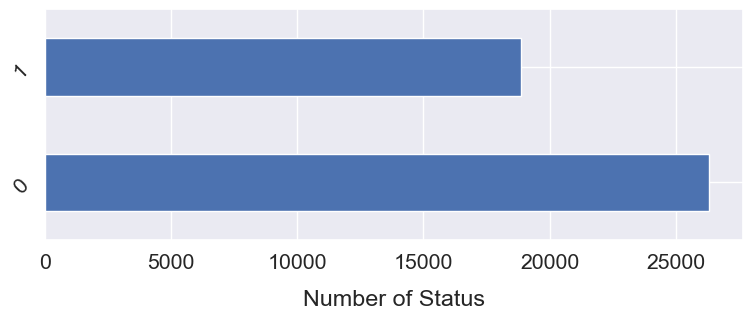

In [6]:
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Status", labelpad=12)
plt.yticks(rotation = 45)

In [7]:
data['label'].value_counts()

0    26335
1    18883
Name: label, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  45218 non-null  object
 1   label    45218 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.7+ KB


In [9]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(data.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = data.iloc[trainIndex]
testData = data.iloc[testIndex]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  45218 non-null  object
 1   label    45218 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.7+ KB


In [11]:
trainData['label'].value_counts()

0    25831
1    18506
Name: label, dtype: int64

In [12]:
trainData.head()

,message,label
0,everything is too hard for me life is so hard ...,1
1,simonmagus you never need an excuse for a lon...,0
2,dubais new airport expected to be the worlds l...,0
3,hahah daniel aww you cried thats a sign that ...,0
4,ah yeah robpattznews is always on top of this...,0


In [13]:
testData['label'].value_counts()

0    504
1    377
Name: label, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  45218 non-null  object
 1   label    45218 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.7+ KB


In [15]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(data.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = data.iloc[trainIndex]
testData = data.iloc[testIndex]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  45218 non-null  object
 1   label    45218 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.7+ KB


In [17]:
trainData['label'].value_counts()

0    25823
1    18528
Name: label, dtype: int64

In [18]:
trainData.head()

,message,label
0,everything is too hard for me life is so hard ...,1
1,simonmagus you never need an excuse for a lon...,0
2,dubais new airport expected to be the worlds l...,0
3,hahah daniel aww you cried thats a sign that ...,0
4,ah yeah robpattznews is always on top of this...,0


In [19]:
testData['label'].value_counts()

0    512
1    355
Name: label, dtype: int64

In [20]:
testData.head()

,message,label
28,at the house of blues in anaheim watching we a...,0
96,just need to say stuff i have lurked here ever...,1
200,ooooh thank you maam,0
203,a void i constantly feel like i have a void in...,1
209,i dont want to have kids because i dont want a...,1


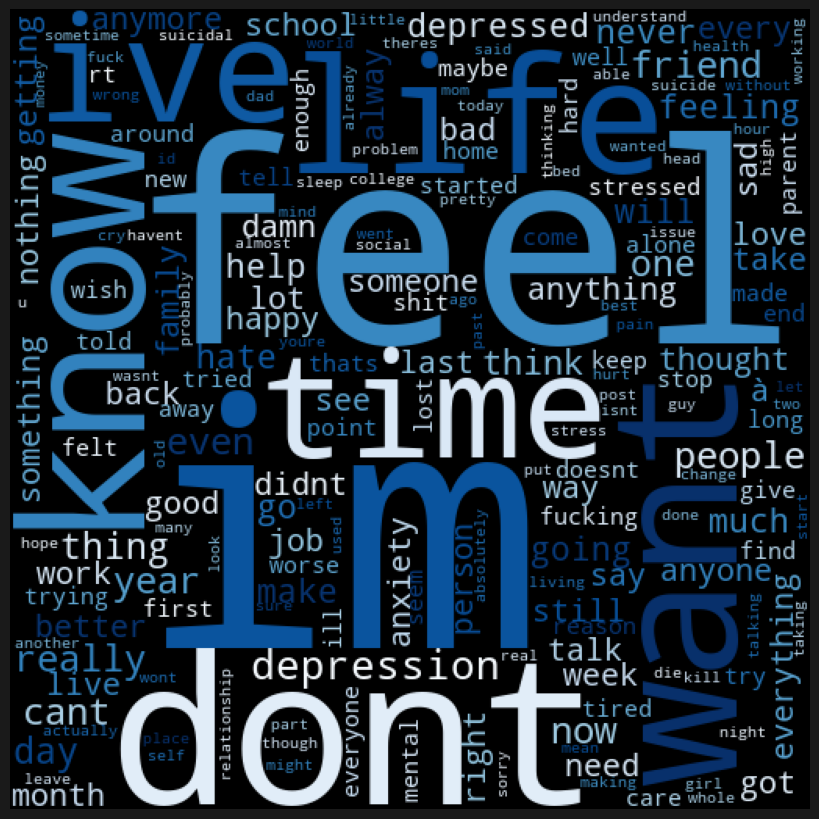

In [21]:
depressive_words = ' '.join(list(data[data['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

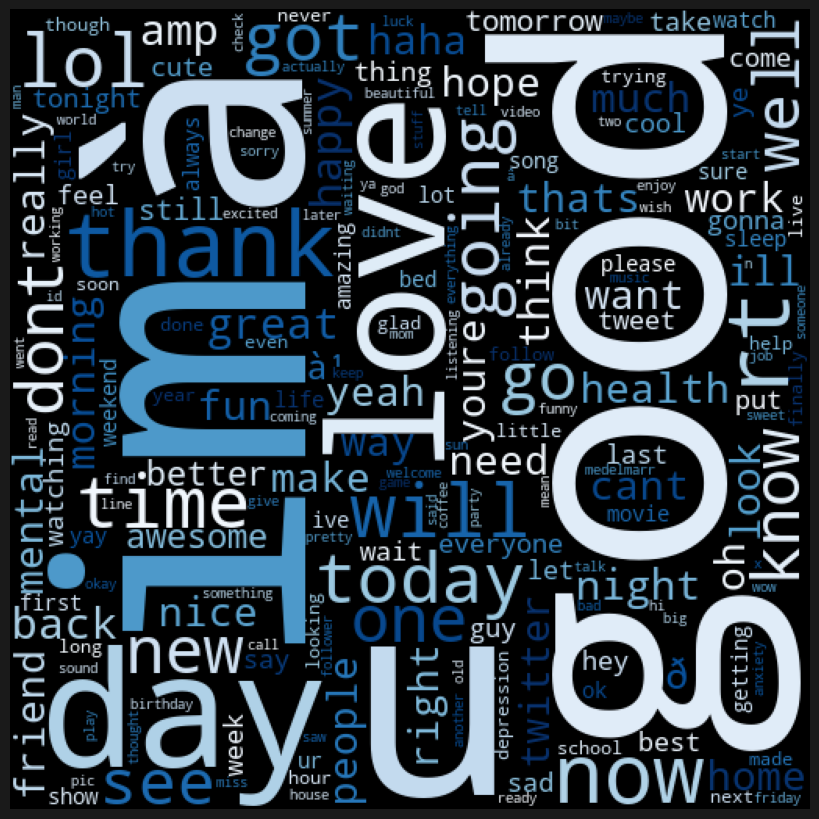

In [22]:
positive_words = ' '.join(list(data[data['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [23]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [24]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.data, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.data.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.data.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [25]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [26]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.9306569343065694
Recall:  0.7183098591549296
F-score:  0.810810810810811
Accuracy:  0.8627450980392157


In [ ]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

In [ ]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('I am done with my life')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('Feeling down...')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('My depression will kill me')
sc_tf_idf.classify(pm)

In [ ]:
#False

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('It’s the little things that make me smile. Got our new car today and this arrived with it')
sc_tf_idf.classify(pm)

In [ ]:
#False+True

In [ ]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_bow.classify(pm)

In [ ]:
pm = process_message('Even if I wan my depression will not let me do anything')
sc_bow.classify(pm)

In [ ]:
pm = process_message('Feeling down need help')
sc_bow.classify(pm)

In [ ]:
#Bow_false_true

In [ ]:
pm = process_message('Feeling down...')
sc_bow.classify(pm)

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_bow.classify(pm)

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_bow.classify(pm)

In [ ]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_bow.classify(pm)